In [1]:
#In this project, we will analyse stock price using a dataset from Google finance.

#We will get stock information for the following banks:

#Bank of America
#CitiGroup
#Goldman Sachs
#JPMorgan Chase
#Morgan Stanley
#Wells Fargo

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import datetime
%matplotlib inline

#optional Plotly method imports
import plotly 
import cufflinks as cf
cf.go_offline()



In [3]:
bank_stocks = pd.read_pickle('all_banks') 
bank_stocks.head()


Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [4]:
#Let's explore the data:
#What is the max Close price for each bank's 
#stock troughout the time period?
tickers=['BAC', 'C', 'GS','JPM','MS','WFC']

for banco in tickers:
    print(banco,'  ', bank_stocks[banco]['Close'].max())


BAC    54.9
C    564.1
GS    247.92
JPM    70.08
MS    89.3
WFC    58.52


In [5]:
#Create a new empty dataframe called returns. This dataframe
#may contain the returns (percentage) for each bank's stock. 
#We can use the pct_change() method on the Close column to 
#create a column of returns.

returns = pd.DataFrame()
for i in tickers:
    returns[i+' Returns']=bank_stocks[i]['Close'].pct_change()

In [6]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


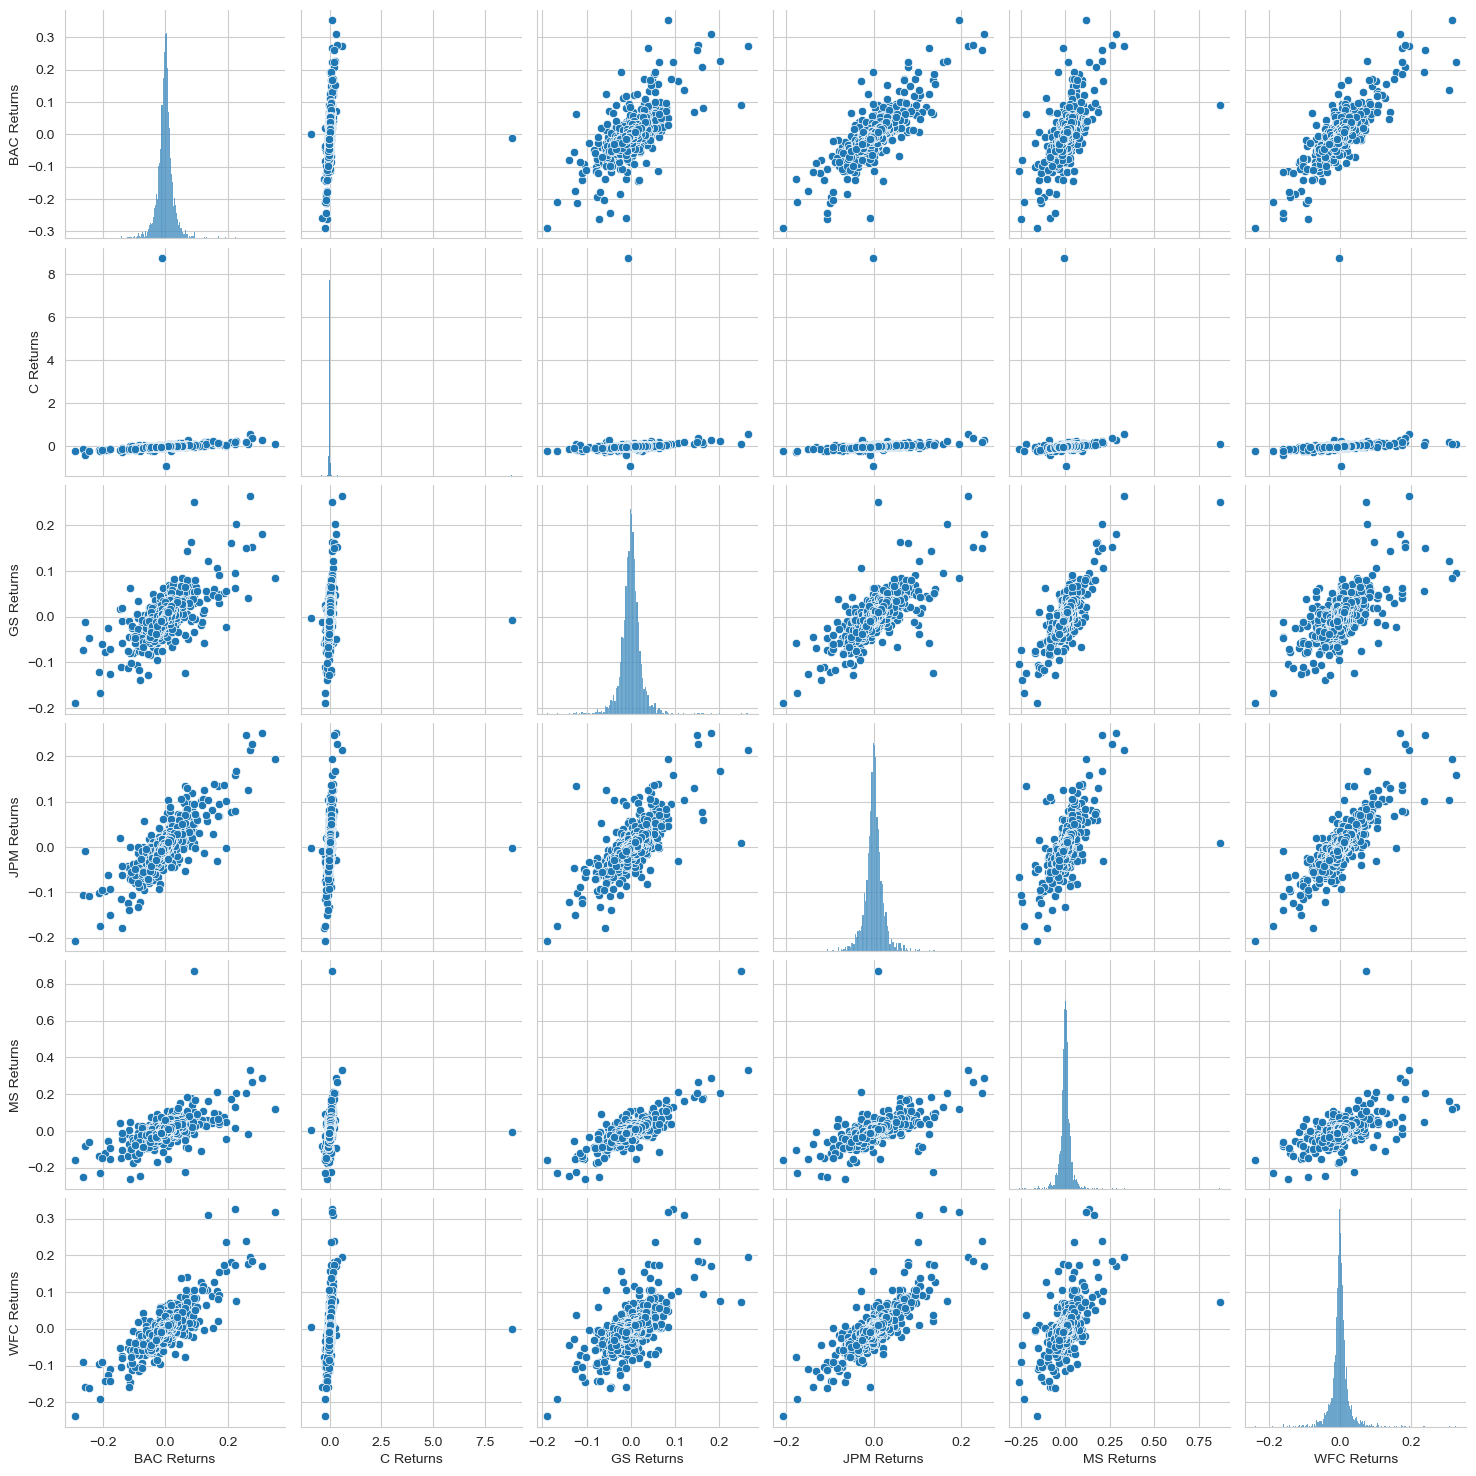

In [7]:
#Now, we are going to create a pairplot of the returns dataframe
#Pair plot is used to understand the best set of features to explain 
#a relationship between two variables or to form the most separated clusters.
sns.pairplot(returns[1:])

In [8]:
#what dates each bank stock had the best and worst single day returns?
#the worst single day gains:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2011-05-06
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [9]:
#the best single day gains:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2011-05-09
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [10]:
#Let's take a look at the standard deviation of the returns.
#The standard deviation is a measure of how risky is the stock.
#A huge standard deviation means the stock goes up and down a lot.

returns.std()

BAC Returns    0.036650
C Returns      0.179969
GS Returns     0.025346
JPM Returns    0.027656
MS Returns     0.037820
WFC Returns    0.030233
dtype: float64

In [11]:
#Standard  deviation of the year 2015
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

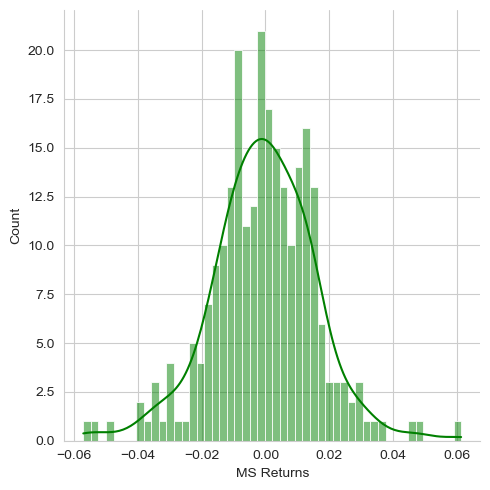

In [12]:
#Morgan Stanley was the most risky bank to invest in 2015.
#Let's create a displot of the 2015 returns for Morgan Stanley
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'], color = 'green',bins=50,kde=True)

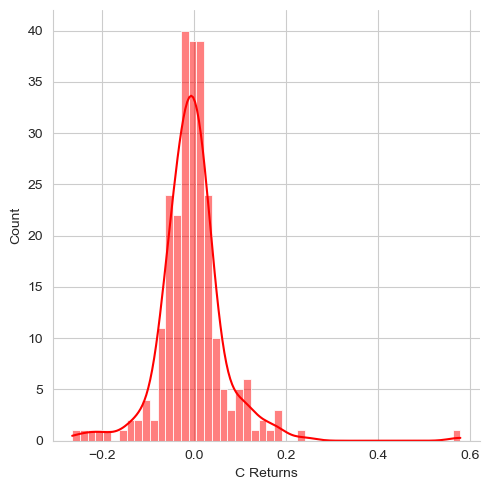

In [13]:
#Let's create a displot of the 2008 returns for CitiGroup
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Returns'], color = 'red',bins=50,kde=True)

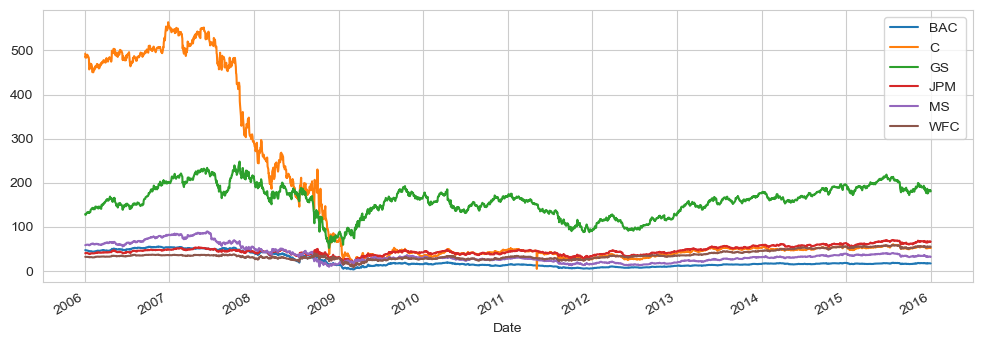

In [14]:
#Let's create a line plot showing close price for each bank 
#for the entire index of time.
for i in tickers:
    bank_stocks[i]['Close'].plot(label=i,figsize=(12,4))

plt.legend()

In [15]:
#We can clearly see that C group crashed after 2008 

<Axes: xlabel='Date'>

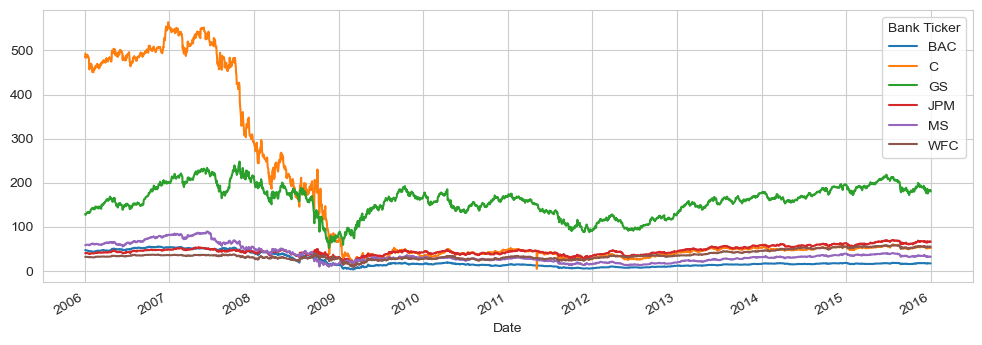

In [16]:
#We could have used the command below to create the same figure above
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,4))

In [17]:
#Let's use the plotly to create a plot of the dataframe
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

In [21]:
#Let's analyse the moving averages for these stocks in the year 2008
#A moving average is a statistic that captures the average change in a data 
#series over time. In finance, moving averages are often used by technical analysts 
#to keep track of price trends for specific securities.

BAC=bank_stocks['BAC']
BAC.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


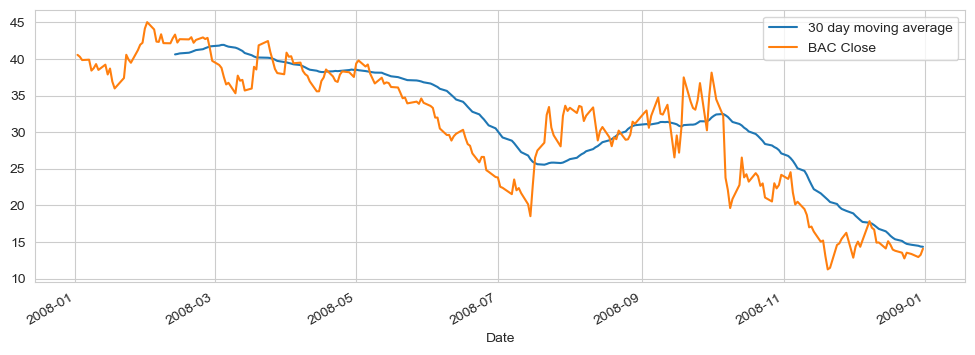

In [24]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

In [31]:
#Let's create a heatmap of the correlation between the
#stocks Close Price.
#the method .xs takes a key argument to select data at a particular level of a MultiIndex.
bank_stocks.xs(key='Close',axis=1,level='Stock Info').head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


In [33]:
#Let's construct a correlation matrix
bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
C,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864
WFC,0.008567,-0.068441,0.499901,0.940279,0.131864,1.000000


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

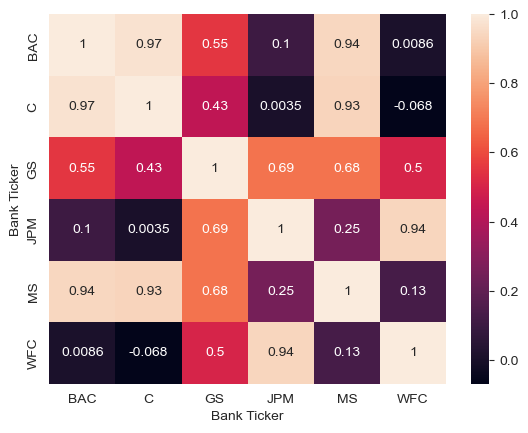

In [35]:
#Now we can create a hetmap with the correlation between the stocks
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)